In [10]:
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
import pandas as pd
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set_palette('colorblind')

In [4]:
hex_y1 = np.load('hex_y1_delta_xips.npy')
hex_y10 = np.load('hex_y10_delta_xips.npy')
random_y1 = np.load('random_y1_delta_xips.npy')
random_y10 = np.load('random_y10_delta_xips.npy')
spiral_y1 = np.load('spiral_y1_delta_xips.npy')
spiral_y10 = np.load('spiral_y10_delta_xips.npy')
r = np.load('r.npy')

In [5]:
reqs = np.loadtxt('./rho_requirements.txt')

In [32]:
len(np.load('hex_rot_y10.npy'))

24

In [11]:
colors = sns.color_palette('colorblind')

In [10]:
sns.set_style('darkgrid')

Text(0,0.5,'$\\delta \\xi_+$')

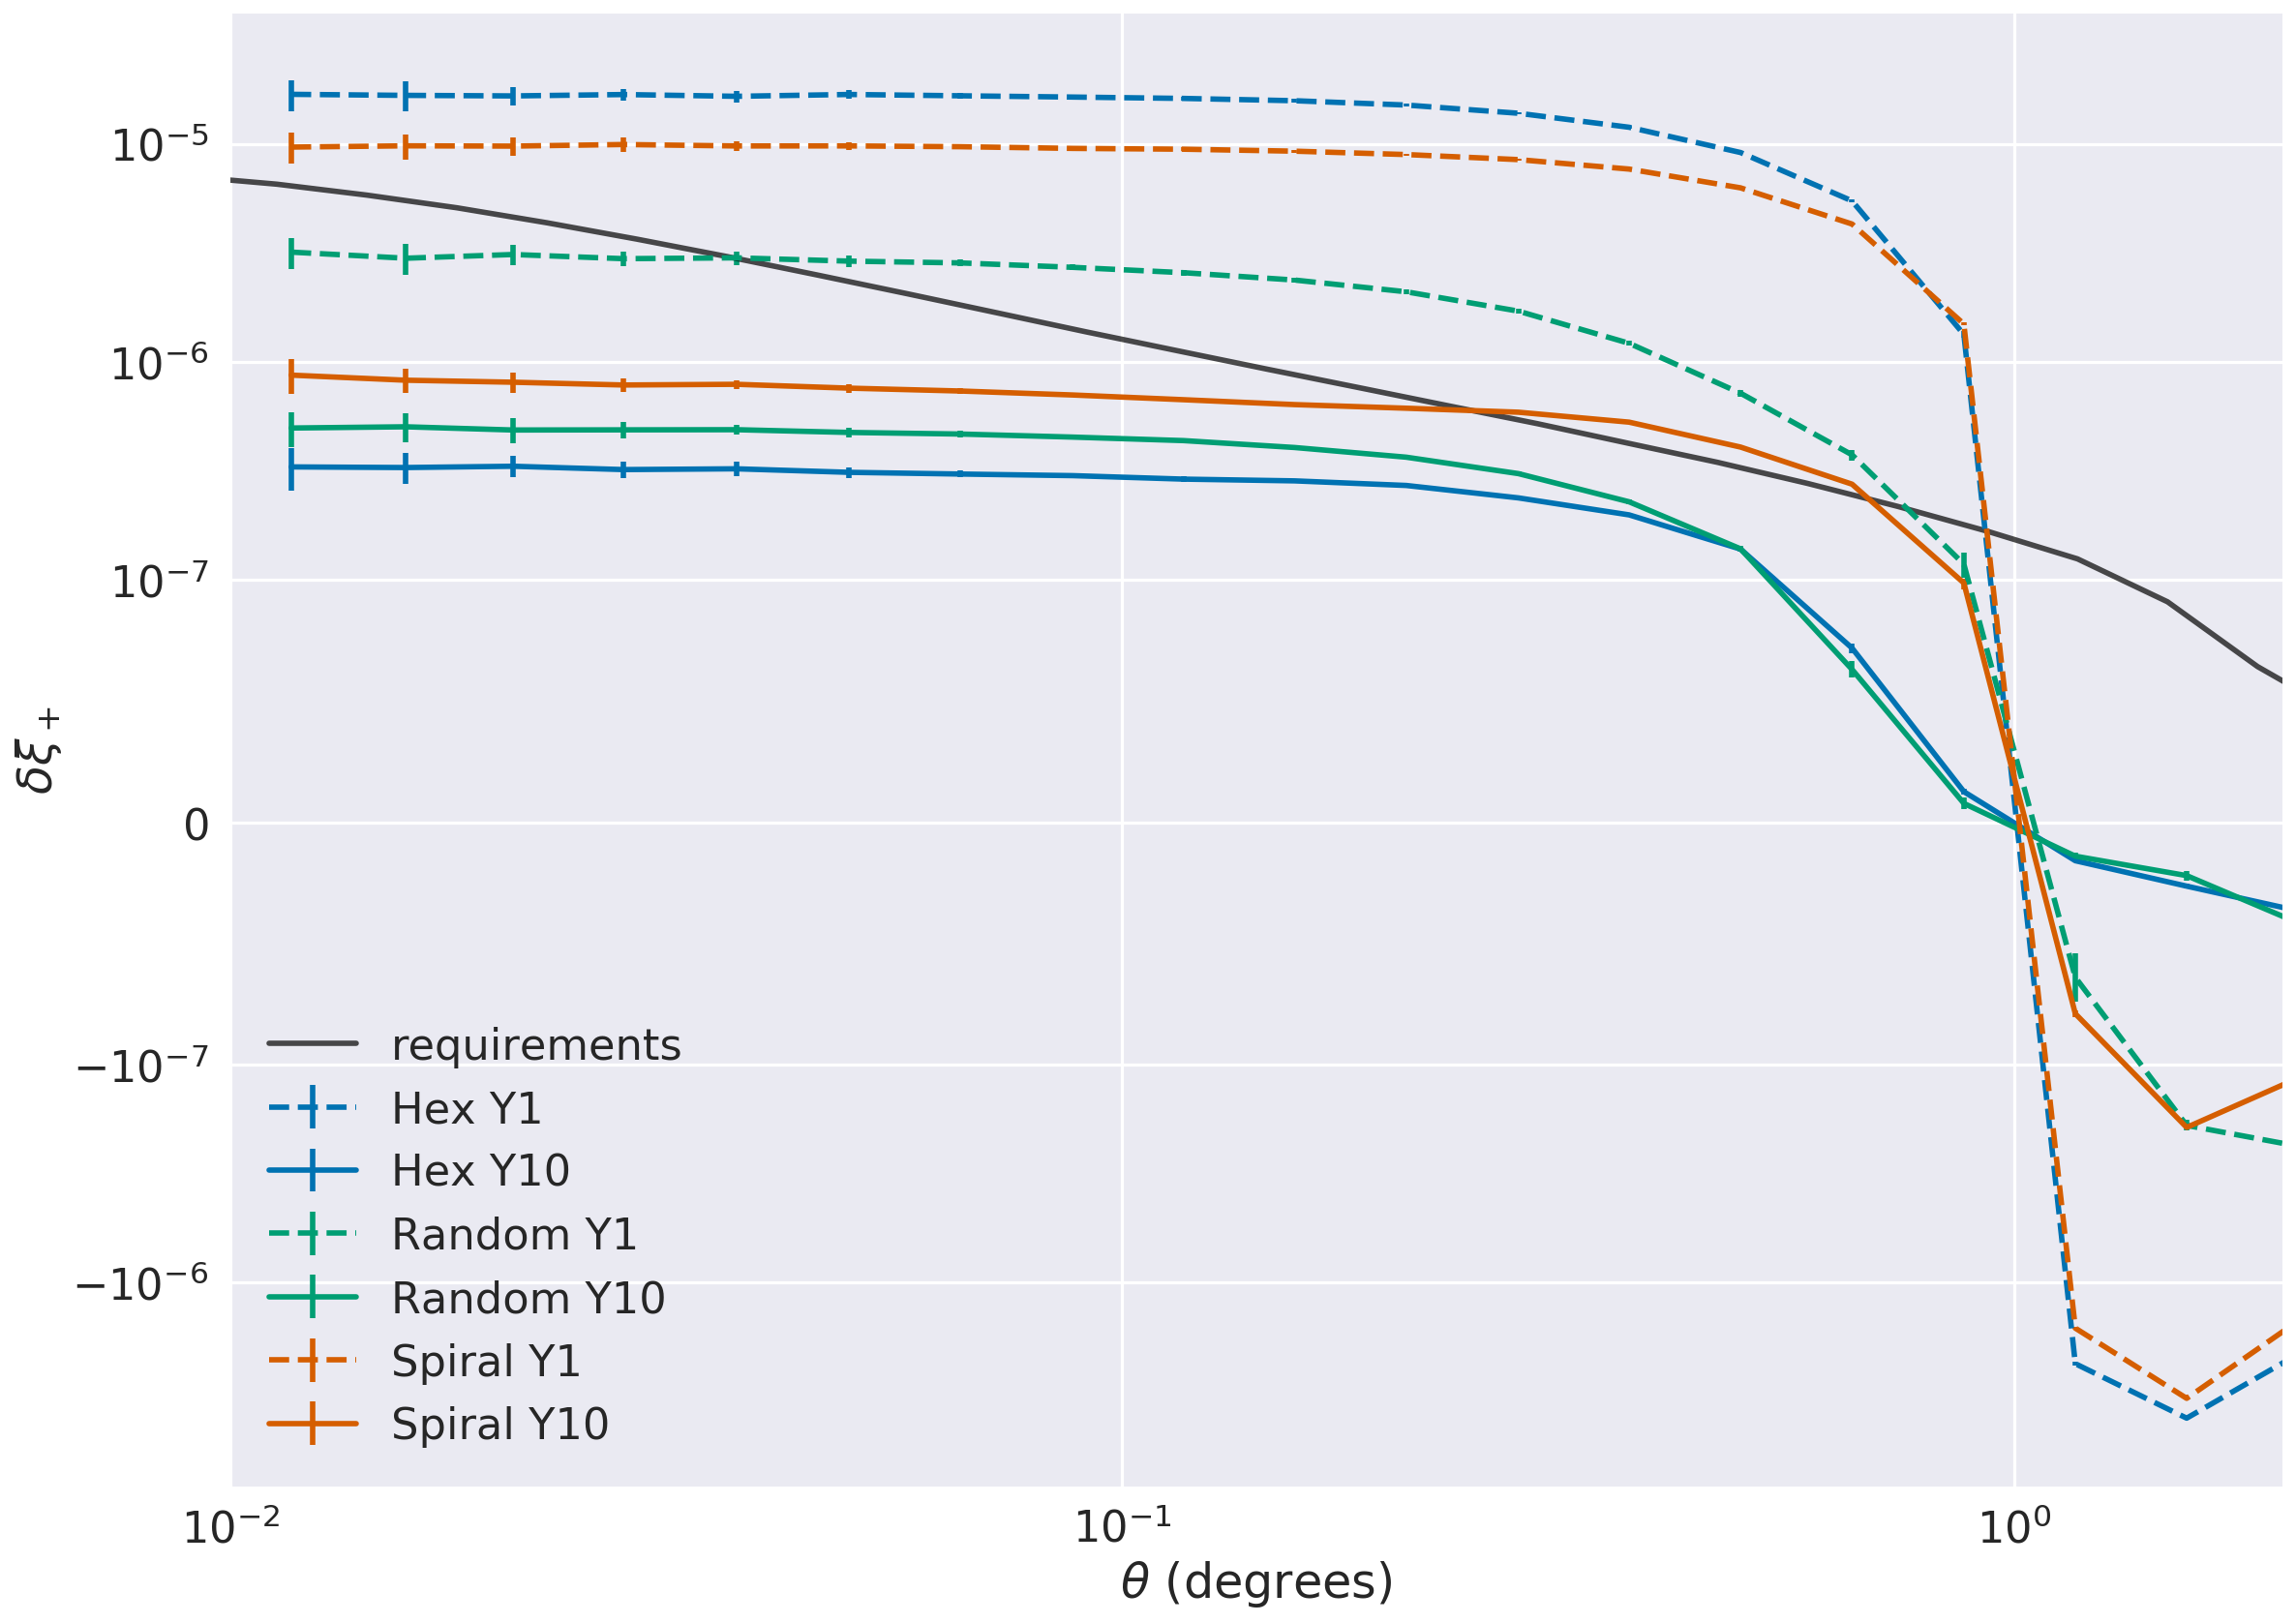

In [19]:
plt.errorbar(r,np.mean(hex_y1,axis=0), np.std(hex_y1,axis=0), linestyle='--', color=colors[0], label='Hex Y1')
plt.errorbar(r,np.mean(hex_y10,axis=0), np.std(hex_y10,axis=0), color=colors[0], label='Hex Y10')

plt.errorbar(r,np.mean(random_y1,axis=0), np.std(random_y1,axis=0), linestyle='--', color=colors[1], label='Random Y1')
plt.errorbar(r,np.mean(random_y10,axis=0), np.std(random_y10,axis=0), color=colors[1], label='Random Y10')

plt.errorbar(r,np.mean(spiral_y1,axis=0), np.std(spiral_y1,axis=0), linestyle='--', color=colors[2], label='Spiral Y1')
plt.errorbar(r,np.mean(spiral_y10,axis=0), np.std(spiral_y10,axis=0), color=colors[2], label='Spiral Y10')


plt.plot(reqs[:,0], reqs[:,1], color='k', label='requirements', alpha=0.7)
plt.legend()

#plt.errorbar(r, np.mean(hex_))
plt.xscale('log')
plt.yscale('symlog',linthreshy=1e-7)
plt.xlim((0.01,2))
plt.xlabel(r'$\theta $ (degrees)')
plt.ylabel(r'$\delta \xi_+$')

## Table

In [ ]:
import scipy.optimize as opt
def fit(xi1,xi2,error, x0=1):

    def chisqfunc(m):
        model = m*xi2
        chisq = numpy.sum(((xi1 - model)/error)**2)
        return chisq

    result = opt.minimize(chisqfunc, x0)
    return result

In [ ]:
df = pd.DataFrame(columns=['Y1','Y10'], index=['Hex','Random','Spiral', 'ALT_Sched', 'FeatureBaseline', 'ALT_SchedRolling', 'FeatureBaselineRolling'])
df['Y1']['Hex'] = df['Y10']['Hex'] = 1
df['Y1']['Spiral'] = fit(SpiralVisitY1.delta_xip, HexVisitY1.delta_xip, SpiralVisitY1.delta_xip_sigma).x[0]
df['Y1']['ALT_Sched'] = fit(ALT_SchedY1.delta_xip, HexVisitY1.delta_xip, ALT_SchedY1.delta_xip_sigma).x[0]
df['Y1']['Random'] = fit(RandomVisitY1.delta_xip, HexVisitY1.delta_xip, RandomVisitY1.delta_xip_sigma).x[0]
df['Y1']['FeatureBaseline'] = fit(FeatureBaselineY1.delta_xip, HexVisitY1.delta_xip, FeatureBaselineY1.delta_xip_sigma).x[0]
df['Y1']['ALT_SchedRolling'] = fit(ALT_SchedRollingY1.delta_xip[1:], HexVisitY1.delta_xip[1:], ALT_SchedRollingY1.delta_xip_sigma[1:]).x[0]
df['Y1']['FeatureBaselineRolling'] = fit(FeatureBaselineRollingY1.delta_xip, HexVisitY1.delta_xip, FeatureBaselineRollingY1.delta_xip_sigma).x[0]
df['Y10']['Spiral'] = fit(SpiralVisitY10.delta_xip, HexVisitY10.delta_xip, SpiralVisitY10.delta_xip_sigma).x[0]
df['Y10']['Random'] = fit(RandomVisitY10.delta_xip, HexVisitY10.delta_xip, RandomVisitY10.delta_xip_sigma).x[0]
df['Y10']['ALT_Sched'] = fit(ALT_SchedY10.delta_xip, HexVisitY10.delta_xip, ALT_SchedY10.delta_xip_sigma).x[0]
df['Y10']['FeatureBaseline'] = fit(abs(FeatureBaselineY10.delta_xip), abs(HexVisitY10.delta_xip), abs(FeatureBaselineY10.delta_xip_sigma)).x[0]
df['Y10']['FeatureBaselineRolling'] = ''
df['Y10']['ALT_SchedRolling'] = ''

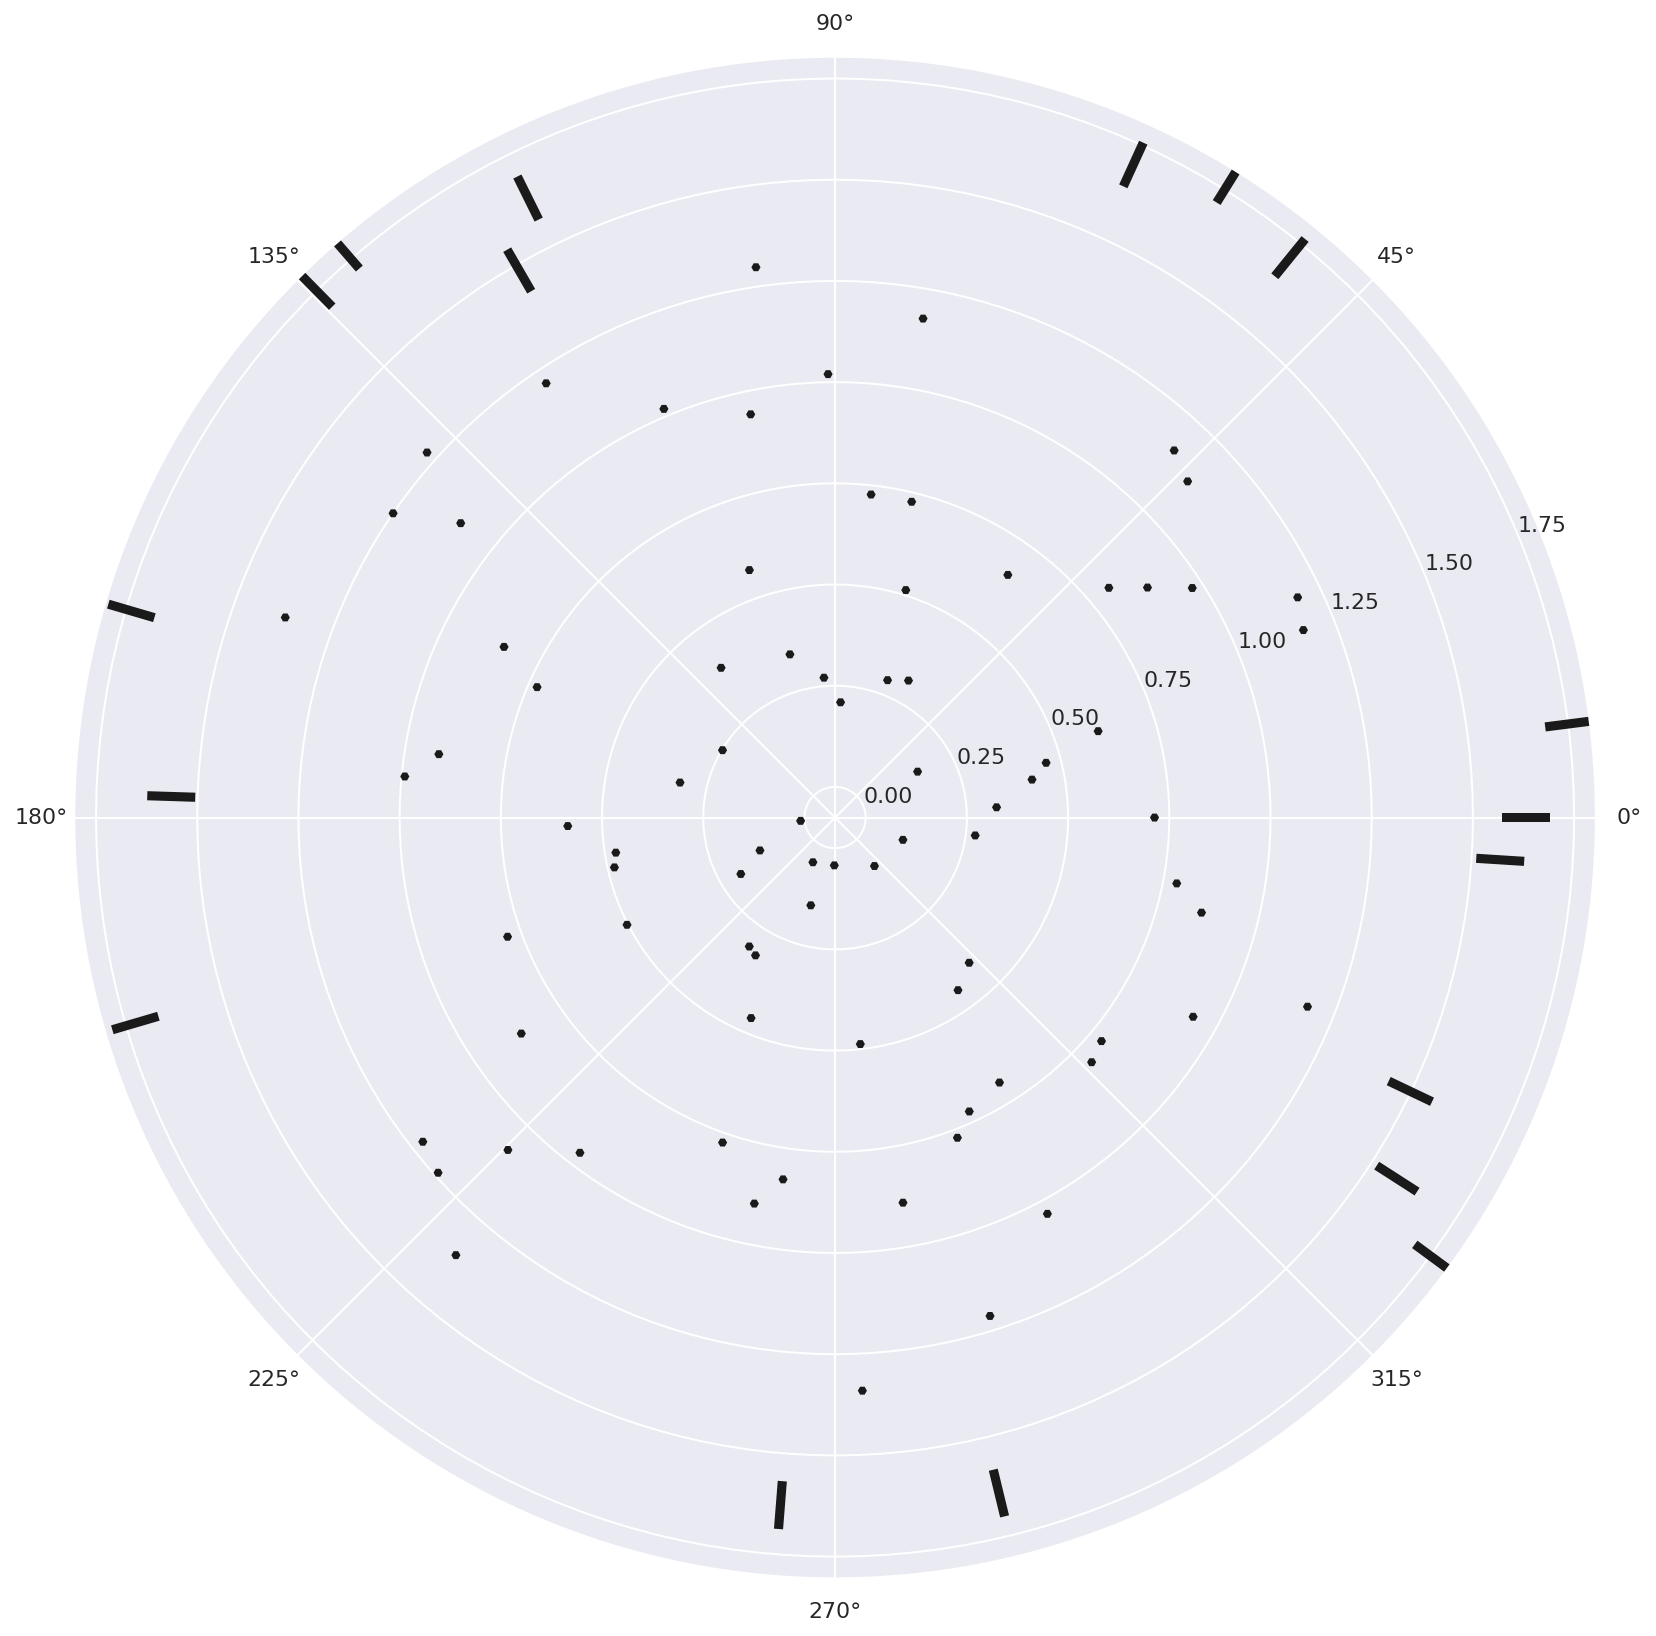

In [231]:
r = np.random.uniform(0,1.75,100)
theta = np.linspace(0,2*np.pi,100)
#theta, r = np.meshgrid(thetas, radii)
U = dr * cos(theta) - dt * sin (theta)
V = dr * sin(theta) + dt * cos(theta)

dr = 1
dt = 0

U[r<1.4]=0
V[r<1.4]=0


f = plt.figure()
ax = f.add_subplot(111, polar=True)
ax.quiver(theta, r, U, V, headlength=0,headaxislength=0, scale=3, scale_units='inches')


In [49]:
df = pd.DataFrame({'r': r, 'theta': theta, 'X':X, 'Y':Y})



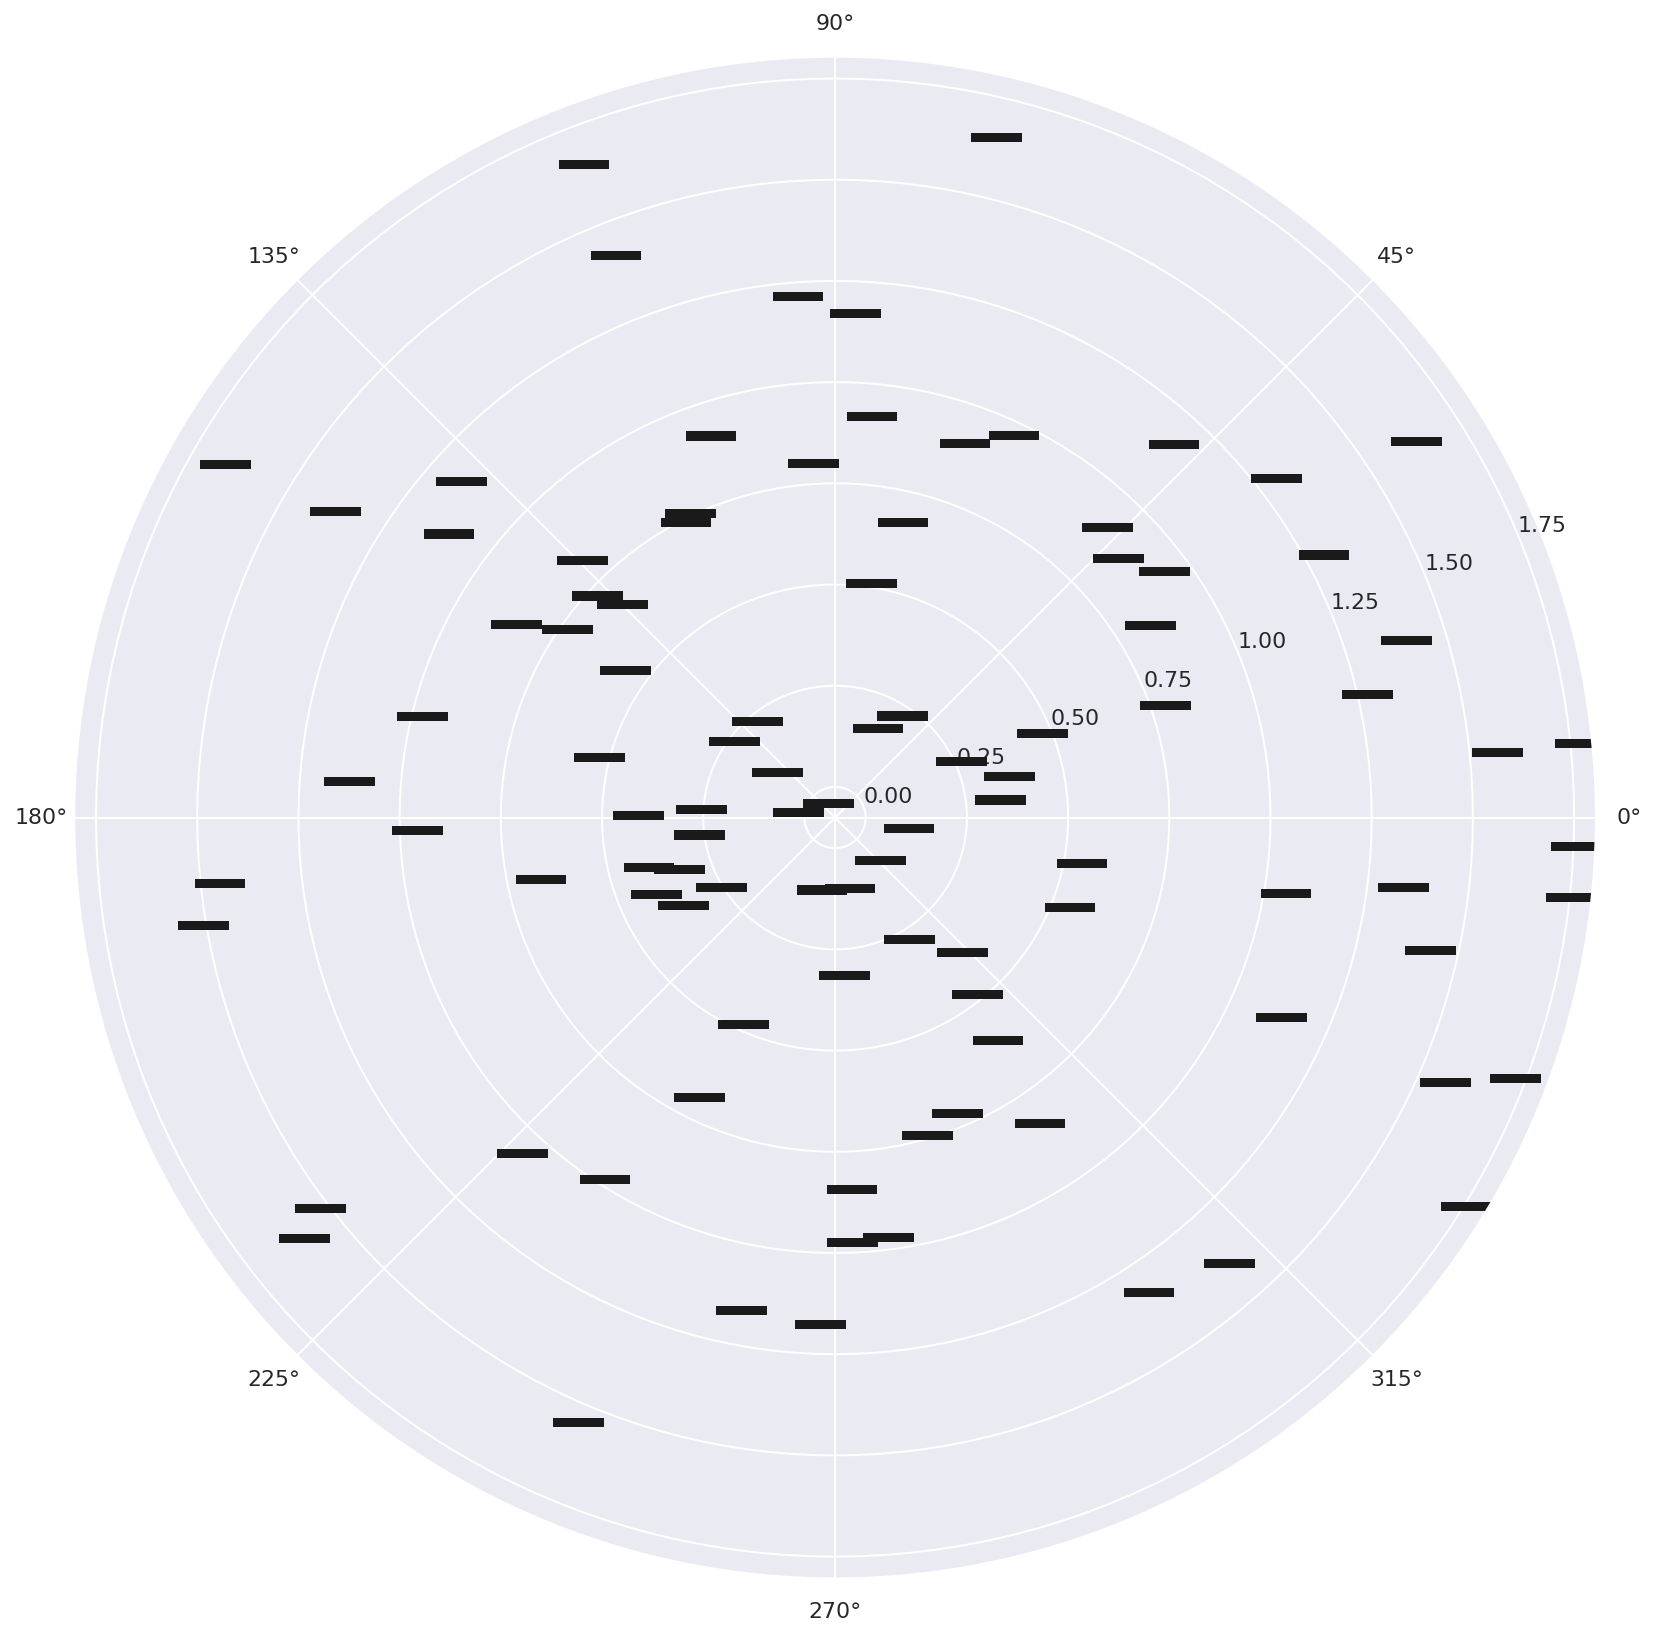

In [239]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.quiver(angles, 1*r, np.ones(100), np.zeros(100), headlength=0,headaxislength=0, scale=30)

In [3]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [5]:
runName='baseline2018a'

def getPointingPlot():
    directory = '/global/cscratch1/sd/husni/OpsimRuns/'
    opsdb = db.OpsimDatabase(directory+runName+'.db')
    outDir = 'temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    nside = 256
    myBundles = {}
    sqlconstraint = 'filter = "i" and proposalId = 3'
    metric = metrics.Coaddm5Metric()
    stackerList = []
    slicer = slicers.HealpixSlicer(nside=nside, useCache=False)

    myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                           stackerList=stackerList, runName=runName,
                                                           metadata='field dither')
    bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll() 
    bundle = myBundles['field dither']
    cond = bundle.metricValues.mask==False
    ra, dec = (bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond]
    fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
c = ax.plot(ra-np.pi,dec,',', alpha=0.5)
new_ticks = ['30°', '60°', '90°', '120°', '150°', '180°', '210°', '240°', '270°', '300°', '330°']
ax.set_xticklabels(new_ticks);

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and proposalId = 3 for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA']
Found 444867 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


[Text(0,0,'30°'),
 Text(0,0,'60°'),
 Text(0,0,'90°'),
 Text(0,0,'120°'),
 Text(0,0,'150°'),
 Text(0,0,'180°'),
 Text(0,0,'210°'),
 Text(0,0,'240°'),
 Text(0,0,'270°'),
 Text(0,0,'300°'),
 Text(0,0,'330°')]

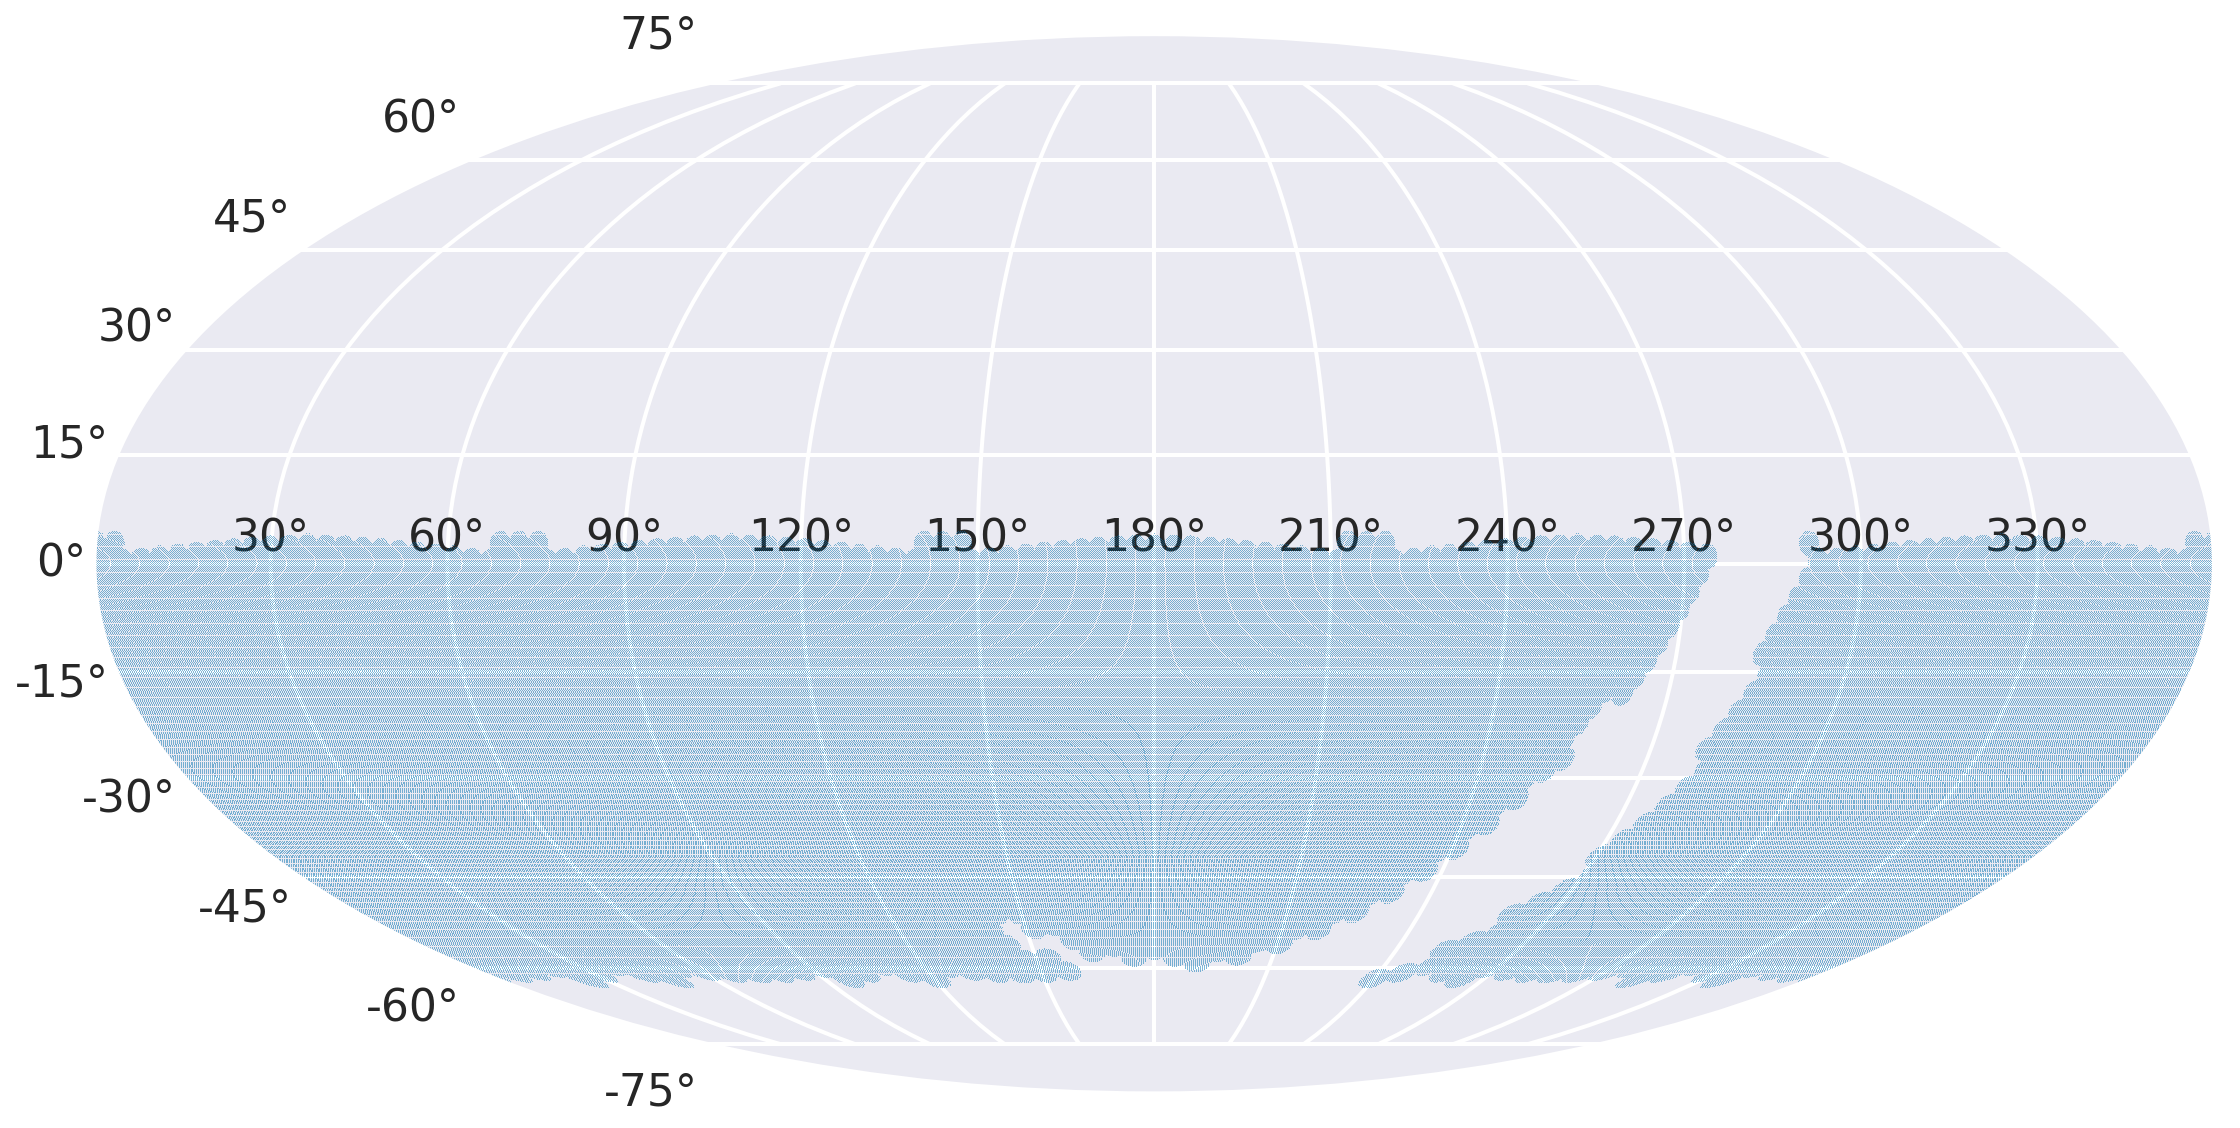